#Base Model that Prints Output


In [ ]:
#inputs
total_sqft = 180000

m = -0.05
b = 1.5

op_expense_per_sqft = 1.20
heating_surcharge_per_sqft = .2
op_exp_annual_growth = .12
annual_mortgage = 1500000
tax_rate = .34

price_per_sqft = [15, 15, 15, 15, 15]

num_years = 5


In [ ]:
#rev calc
perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
print("revenue: ", revenue)

revenue:  [2025000.0, 2025000.0, 2025000.0, 2025000.0, 2025000.0]


In [ ]:
#operating expense calculations
base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
mortgage = [annual_mortgage for i in range(num_years)]
operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
print("operating costs:", operating_costs)

operating costs: [1748400.0, 1778208.0, 1811592.96, 1848984.1152000001, 1890862.2090240002]


In [ ]:
#before and after-tax earnings
ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
taxes = [ebt[i]*tax_rate for i in range(num_years)]
earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
print("earnings after tax: ", earnings_after_tax)

total_earnings_after_tax = sum(earnings_after_tax)
print("total earnings after tax: ", total_earnings_after_tax)

earnings after tax:  [182556.0, 162882.72, 140848.64640000003, 116170.48396799993, 88530.94204415986]
total earnings after tax:  690988.7924121597


#Model as Function



In [ ]:
def office_earnings(total_sqft = 180000,
           m = -0.05,
           b = 1.5,
           op_expense_per_sqft = 1.20,
           heating_surcharge_per_sqft = .2,
           op_exp_annual_growth = .12,
           annual_mortgage = 1500000,
           tax_rate = .34,
           price_per_sqft = [15, 15, 15, 15, 15],
           num_years = 5):
  #rev calc
  perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
  sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
  revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
  #operating expense calculations
  base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
  base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
  heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
  mortgage = [annual_mortgage for i in range(num_years)]
  operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
  #before and after-tax earnings
  ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
  taxes = [ebt[i]*tax_rate for i in range(num_years)]
  earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
  total_earnings_after_tax = sum(earnings_after_tax)
  return total_earnings_after_tax


In [ ]:
office_earnings()

690988.7924121597

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# generate simulated numbers
num_sim = 10000
sim_total_sqft = np.random.normal(180000,36000,num_sim)
sim_m = np.random.normal(-0.05,0.01,num_sim)
sim_b = np.random.normal(1.5,0.3,num_sim)
sim_op_exp_sqft = np.random.normal(1.2,.24,num_sim)
sim_heating_surcharge_sqft = np.random.normal(0.2,0.04,num_sim)
sim_op_exp_growth = np.random.normal(0.12,0.024,num_sim)

(array([1.400e+01, 2.050e+02, 1.543e+03, 3.542e+03, 3.034e+03, 1.276e+03,
        3.230e+02, 5.300e+01, 9.000e+00, 1.000e+00]),
 array([-11187141.19523618,  -8199273.24221481,  -5211405.28919344,
         -2223537.33617206,    764330.61684931,   3752198.56987067,
          6740066.52289205,   9727934.47591342,  12715802.42893479,
         15703670.38195616,  18691538.33497753]),
 <a list of 10 Patch objects>)

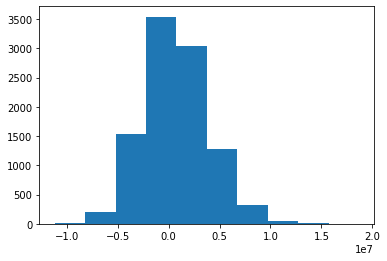

In [ ]:
# calculate the profit
sim_profits = [office_earnings(total_sqft = sim_total_sqft[i],
                                m = sim_m[i],
                                b = sim_b[i],
                                op_expense_per_sqft = sim_op_exp_sqft[i],
                                heating_surcharge_per_sqft = sim_heating_surcharge_sqft[i],
                                op_exp_annual_growth = sim_op_exp_growth[i],
                                annual_mortgage = 1500000,
                                tax_rate = .34,
                                price_per_sqft = [15, 15, 15, 15, 15],
                                num_years = 5) for i in range(num_sim)]

plt.hist(sim_profits)

In [ ]:
# linear regression analysis
import pandas as pd


In [ ]:
data = pd.DataFrame(zip(sim_total_sqft,sim_op_exp_sqft,sim_b,sim_m,sim_heating_surcharge_sqft,sim_op_exp_growth,sim_profits),
                    columns = ['sim_total_sqft','sim_op_exp_sqft','sim_b','sim_m','sim_heating_surcharge_sqft','sim_op_exp_growth','sim_profits'])
data

,sim_total_sqft,sim_op_exp_sqft,sim_b,sim_m,sim_heating_surcharge_sqft,sim_op_exp_growth,sim_profits
0,132207.120262,1.223528,1.393362,-0.048490,0.181947,0.113139,-1.341587e+06
1,183687.205718,1.522439,1.179230,-0.038207,0.212505,0.105452,-7.246962e+05
2,202275.422977,0.683572,1.642091,-0.048548,0.224838,0.123636,3.496296e+06
3,158079.419016,1.406734,1.232112,-0.043259,0.220112,0.135337,-1.470932e+06
4,169220.893842,1.110864,1.831960,-0.054990,0.290573,0.088895,2.528290e+06
...,...,...,...,...,...,...,...
9995,241841.849994,1.252434,1.111256,-0.058092,0.270171,0.151031,-3.516503e+06
9996,178355.492474,1.295286,1.346079,-0.050655,0.230636,0.126067,-8.871534e+05
9997,92824.016023,0.877350,2.021605,-0.058011,0.283991,0.120274,-1.127448e+05
9998,213643.121769,1.163109,1.593517,-0.051884,0.250284,0.077728,2.518454e+06


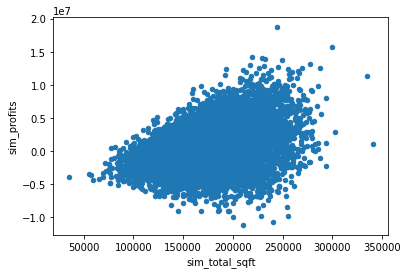

In [ ]:
# scatterplots
data.plot.scatter("sim_total_sqft","sim_profits")

In [ ]:
# linear regression
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(data[['sim_total_sqft','sim_op_exp_sqft','sim_b','sim_m','sim_heating_surcharge_sqft','sim_op_exp_growth']])
y = data['sim_profits']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
mod = sm.OLS(y,x,hasconstant = True)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sim_profits   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 4.752e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:56   Log-Likelihood:            -1.4706e+05
No. Observations:               10000   AIC:                         2.941e+05
Df Residuals:                    9993   BIC:                         2.942e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.013e+07   7.21e+04   -140.391      0.000   -1.03e+07   -9.99e+06
sim_total_sqft                31.3288      0.164    190.847      0.000      31.007      31.651
sim_op_exp_sqft            -8.833e+05   2.46e+04    -35.857      0.000   -9.32e+05   -8.35e+05
sim_b                       8.733e+06   1.96e+04    446.306      0.000    8.69e+06    8.77e+06
sim_m                       1.298e+08   5.86e+05    221.463      0.000    1.29e+08    1.31e+08
sim_heating_surcharge_sqft -7.003e+05   1.48e+05     -4.731      0.000    -9.9e+05    -4.1e+05
sim_op_exp_growth          -1.871e+06   2.46e+05     -7.617      0.000   -2.35e+06   -1.39e+06
==============================================================================
Omnibus:                     1145.458   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11053.631
Skew:                           0.106   Prob(JB):                         0.00
Kurtosis:                       8.146   Cond. No.                     1.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
result.params * x.std()

const                        -0.000000e+00
sim_total_sqft                1.125594e+06
sim_op_exp_sqft              -2.114488e+05
sim_b                         2.632090e+06
sim_m                         1.306067e+06
sim_heating_surcharge_sqft   -2.790963e+04
sim_op_exp_growth            -4.492516e+04
dtype: float64

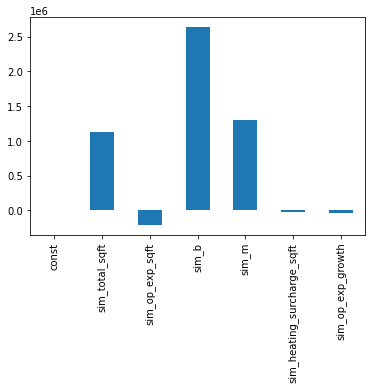

In [ ]:
# bar graph
normalized_coefficients = result.params * x.std()
normalized_coefficients.plot.bar()